In [21]:
 #代价函数 J(θ)
def computeCost(X, y, theta):                 
    inner = np.power(((X * theta.T) - y), 2)   
    return np.sum(inner) / (2 * len(X))       
    # * 在matrix类型中是矩阵的叉乘，multiply是对应元素相乘
    # * 在ndarray类型中，dot或 @ 是叉乘，* 是对应元素相乘

In [22]:
#通过梯度下降法来求使代价函数最小的参数theta
def gradientDescent(X, y, theta, alpha, epoch):
    temp = np.matrix(np.zeros(theta.shape)) # 初始化一个θ临时矩阵
    parameters = int(theta.ravel().shape[1]) # 参数θ的数量
    cost = np.zeros(epoch)  # 初始化一个ndarray，包含每次epoch的cost
    m = X.shape[0]  # 样本的数量
    
    for i in range(epoch):
        # 利用向量化一步求解
        temp = theta - (alpha / m) * (X * theta.T - y).T * X
        theta = temp
        cost[i] = computeCost(X, y, theta)

# 以下是不用向量化求解梯度下降
#         error = (X * theta.T) - y  # (97, 1)
        
#         for j in range(parameters):
#             term = np.multiply(error, X[:,j])  # (97, 1)
#             temp[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))  # (1,1)
    
    return theta, cost

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('E:\大三上\人工神经网络\ex1data2.txt',names=['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
data = (data - data.mean()) / data.std()
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [25]:
data.insert(0,'one',1)
data.head()

X2 = data.iloc[:,0:3]
y2 = data.iloc[:,[3]]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix([0,0,0])

In [26]:
X2.shape, theta2.shape, y2.shape
#((47, 3), (1, 3), (47, 1))

((47, 3), (1, 3), (47, 1))

In [27]:
computeCost(X2,y2,theta2)
#0.48936170212765967

0.48936170212765967

In [29]:
alpha = 0.01
epoch = 1000
final_theta2, cost2 = gradientDescent(X2, y2, theta2, alpha, epoch)
computeCost(X2, y2, final_theta2)
#0.13070336960771892

0.13070336960771892

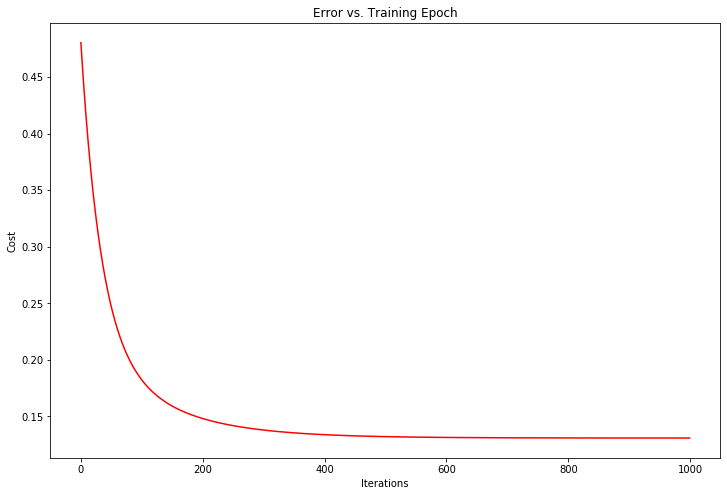

In [33]:
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(np.arange(epoch), cost2, 'r')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
ax2.set_title('Error vs. Training Epoch')
plt.show()